In [1]:
from itertools import chain
from itertools import product
import numpy as np
import anndata as ad
import pandas as pd

import scanpy as sc
import scanpy.external as sce

# import scvelo as scv
# import cellrank as cr
import seaborn as sns
from scipy import io
from scipy import sparse

import gc
gc.enable()

In [2]:
import os
os.chdir('/local/workdir/dwm269/scCardiacOrganoid/')

In [3]:
from scripts.py.scantils import *
# from scripts.py.scanplots import *

In [4]:
# Load metadata
meta = pd.read_csv("resources/metadata.csv")
meta = meta.loc[meta["source"]=="Hoang et al",]
meta = meta.loc[meta["include"],]
meta.index = list(range(0, len(meta)))
meta

sample  include                                           data.dir  \
0       D0_600um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
1       D1_600um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
2       D4_200um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
3       D4_600um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
4      D4_1000um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
5       D6_600um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
6       D8_600um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
7      D12_600um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
8    D21_200um_B     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
9      D21_600um     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   
10  D21_1000um_B     True  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   

   pattern  pattern_int timepoint  time_int       cell_line       source  \
0    600um        600.0        D0         0  GCaMP6f hiPSCs  Hoang et al   
1    600um        600.0        D1         1  GCaMP6f hiPSCs  Hoang et al   
2    200um        200.0        D4         4  GCaMP6f hiPSCs  Hoang et al   
3    600um        600.0        D4         4  GCaMP6f hiPSCs  Hoang et al   
4   1000um       1000.0        D4         4  GCaMP6f hiPSCs  Hoang et al   
5    600um        600.0        D6         6  GCaMP6f hiPSCs  Hoang et al   
6    600um        600.0        D8         8  GCaMP6f hiPSCs  Hoang et al   
7    600um        600.0       D12        12  GCaMP6f hiPSCs  Hoang et al   
8    200um        200.0       D21        21  GCaMP6f hiPSCs  Hoang et al   
9    600um        600.0       D21        21  GCaMP6f hiPSCs  Hoang et al   
10  1000um       1000.0       D21        21  GCaMP6f hiPSCs  Hoang et al   

    soupx  soupx_rho_GeneFull  
0   False                 NaN  
1   False                 NaN  
2    True               0.076  
3    True               0.070  
4    True               0.140  
5    True               0.029  
6    True               0.015  
7    True               0.017  
8    True               0.011  
9    True               0.039  
10   True               0.030

# Load and subset data

In [10]:
adata = sc.read_h5ad(
    filename="data/pyobjs/scCO_v7-3.h5ad" 
)

# adata = adata[adata.obs[]]

# https://github.com/scverse/scanpy/issues/2239
adata.uns['log1p']["base"] = None 

In [8]:
adata.obs

sample  include  \
ATACCTTCAATCGCGC      D0_600um     True   
GCCGTGAGTGTCGCTG      D0_600um     True   
GCGATCGTCCCAAGTA      D0_600um     True   
GTATTGGCATCAGTGT      D0_600um     True   
TCATGAGGTCGAACAG      D0_600um     True   
...                        ...      ...   
TTTGGTTAGACCAGAC  D21_1000um_B     True   
TTTGGTTAGCGAAACC  D21_1000um_B     True   
TTTGGTTAGTTTGGCT  D21_1000um_B     True   
TTTGGTTGTGAGGATC  D21_1000um_B     True   
TTTGTTGTCTATGTGG  D21_1000um_B     True   

                                                           data.dir pattern  \
ATACCTTCAATCGCGC  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   600um   
GCCGTGAGTGTCGCTG  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   600um   
GCGATCGTCCCAAGTA  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   600um   
GTATTGGCATCAGTGT  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   600um   
TCATGAGGTCGAACAG  /workdir/dwm269/scCardiacOrganoid/data/STARsol...   600um   
...                                                             ...     ...   
TTTGGTTAGACCAGAC  /workdir/dwm269/scCardiacOrganoid/data/STARsol...  1000um   
TTTGGTTAGCGAAACC  /workdir/dwm269/scCardiacOrganoid/data/STARsol...  1000um   
TTTGGTTAGTTTGGCT  /workdir/dwm269/scCardiacOrganoid/data/STARsol...  1000um   
TTTGGTTGTGAGGATC  /workdir/dwm269/scCardiacOrganoid/data/STARsol...  1000um   
TTTGTTGTCTATGTGG  /workdir/dwm269/scCardiacOrganoid/data/STARsol...  1000um   

                  pattern_int timepoint  time_int       cell_line  \
ATACCTTCAATCGCGC        600.0        D0       0.0  GCaMP6f hiPSCs   
GCCGTGAGTGTCGCTG        600.0        D0       0.0  GCaMP6f hiPSCs   
GCGATCGTCCCAAGTA        600.0        D0       0.0  GCaMP6f hiPSCs   
GTATTGGCATCAGTGT        600.0        D0       0.0  GCaMP6f hiPSCs   
TCATGAGGTCGAACAG        600.0        D0       0.0  GCaMP6f hiPSCs   
...                       ...       ...       ...             ...   
TTTGGTTAGACCAGAC       1000.0       D21      21.0  GCaMP6f hiPSCs   
TTTGGTTAGCGAAACC       1000.0       D21      21.0  GCaMP6f hiPSCs   
TTTGGTTAGTTTGGCT       1000.0       D21      21.0  GCaMP6f hiPSCs   
TTTGGTTGTGAGGATC       1000.0       D21      21.0  GCaMP6f hiPSCs   
TTTGTTGTCTATGTGG       1000.0       D21      21.0  GCaMP6f hiPSCs   

                       source  soupx  ...  leiden_harmony_sp_0.8  \
ATACCTTCAATCGCGC  Hoang et al  False  ...                      1   
GCCGTGAGTGTCGCTG  Hoang et al  False  ...                      1   
GCGATCGTCCCAAGTA  Hoang et al  False  ...                      1   
GTATTGGCATCAGTGT  Hoang et al  False  ...                      1   
TCATGAGGTCGAACAG  Hoang et al  False  ...                      1   
...                       ...    ...  ...                    ...   
TTTGGTTAGACCAGAC  Hoang et al   True  ...                      4   
TTTGGTTAGCGAAACC  Hoang et al   True  ...                      4   
TTTGGTTAGTTTGGCT  Hoang et al   True  ...                      4   
TTTGGTTGTGAGGATC  Hoang et al   True  ...                      4   
TTTGTTGTCTATGTGG  Hoang et al   True  ...                      4   

                  leiden_harmony_sp_1.0  leiden_harmony_sp_1.2  \
ATACCTTCAATCGCGC                     11                     11   
GCCGTGAGTGTCGCTG                     11                     11   
GCGATCGTCCCAAGTA                     11                     11   
GTATTGGCATCAGTGT                     11                     11   
TCATGAGGTCGAACAG                     11                     11   
...                                 ...                    ...   
TTTGGTTAGACCAGAC                      7                      6   
TTTGGTTAGCGAAACC                      8                      7   
TTTGGTTAGTTTGGCT                      8                      7   
TTTGGTTGTGAGGATC                      7                      6   
TTTGTTGTCTATGTGG                      7                      6   

                  leiden_harmony_s_0.8  leiden_harmony_s_1.0  \
ATACCTTCAATCGCGC                     3                 

In [11]:
# tmp_cell_types = ['Definitive_Endoderm', 'Foregut_Epithelium', 'Liver_Progenitors'] 
# adata = adata[adata.obs['cell_types'].isin(tmp_cell_types)]

adata = adata[adata.obs['cell_types_level1'] == "Endoderm"]

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


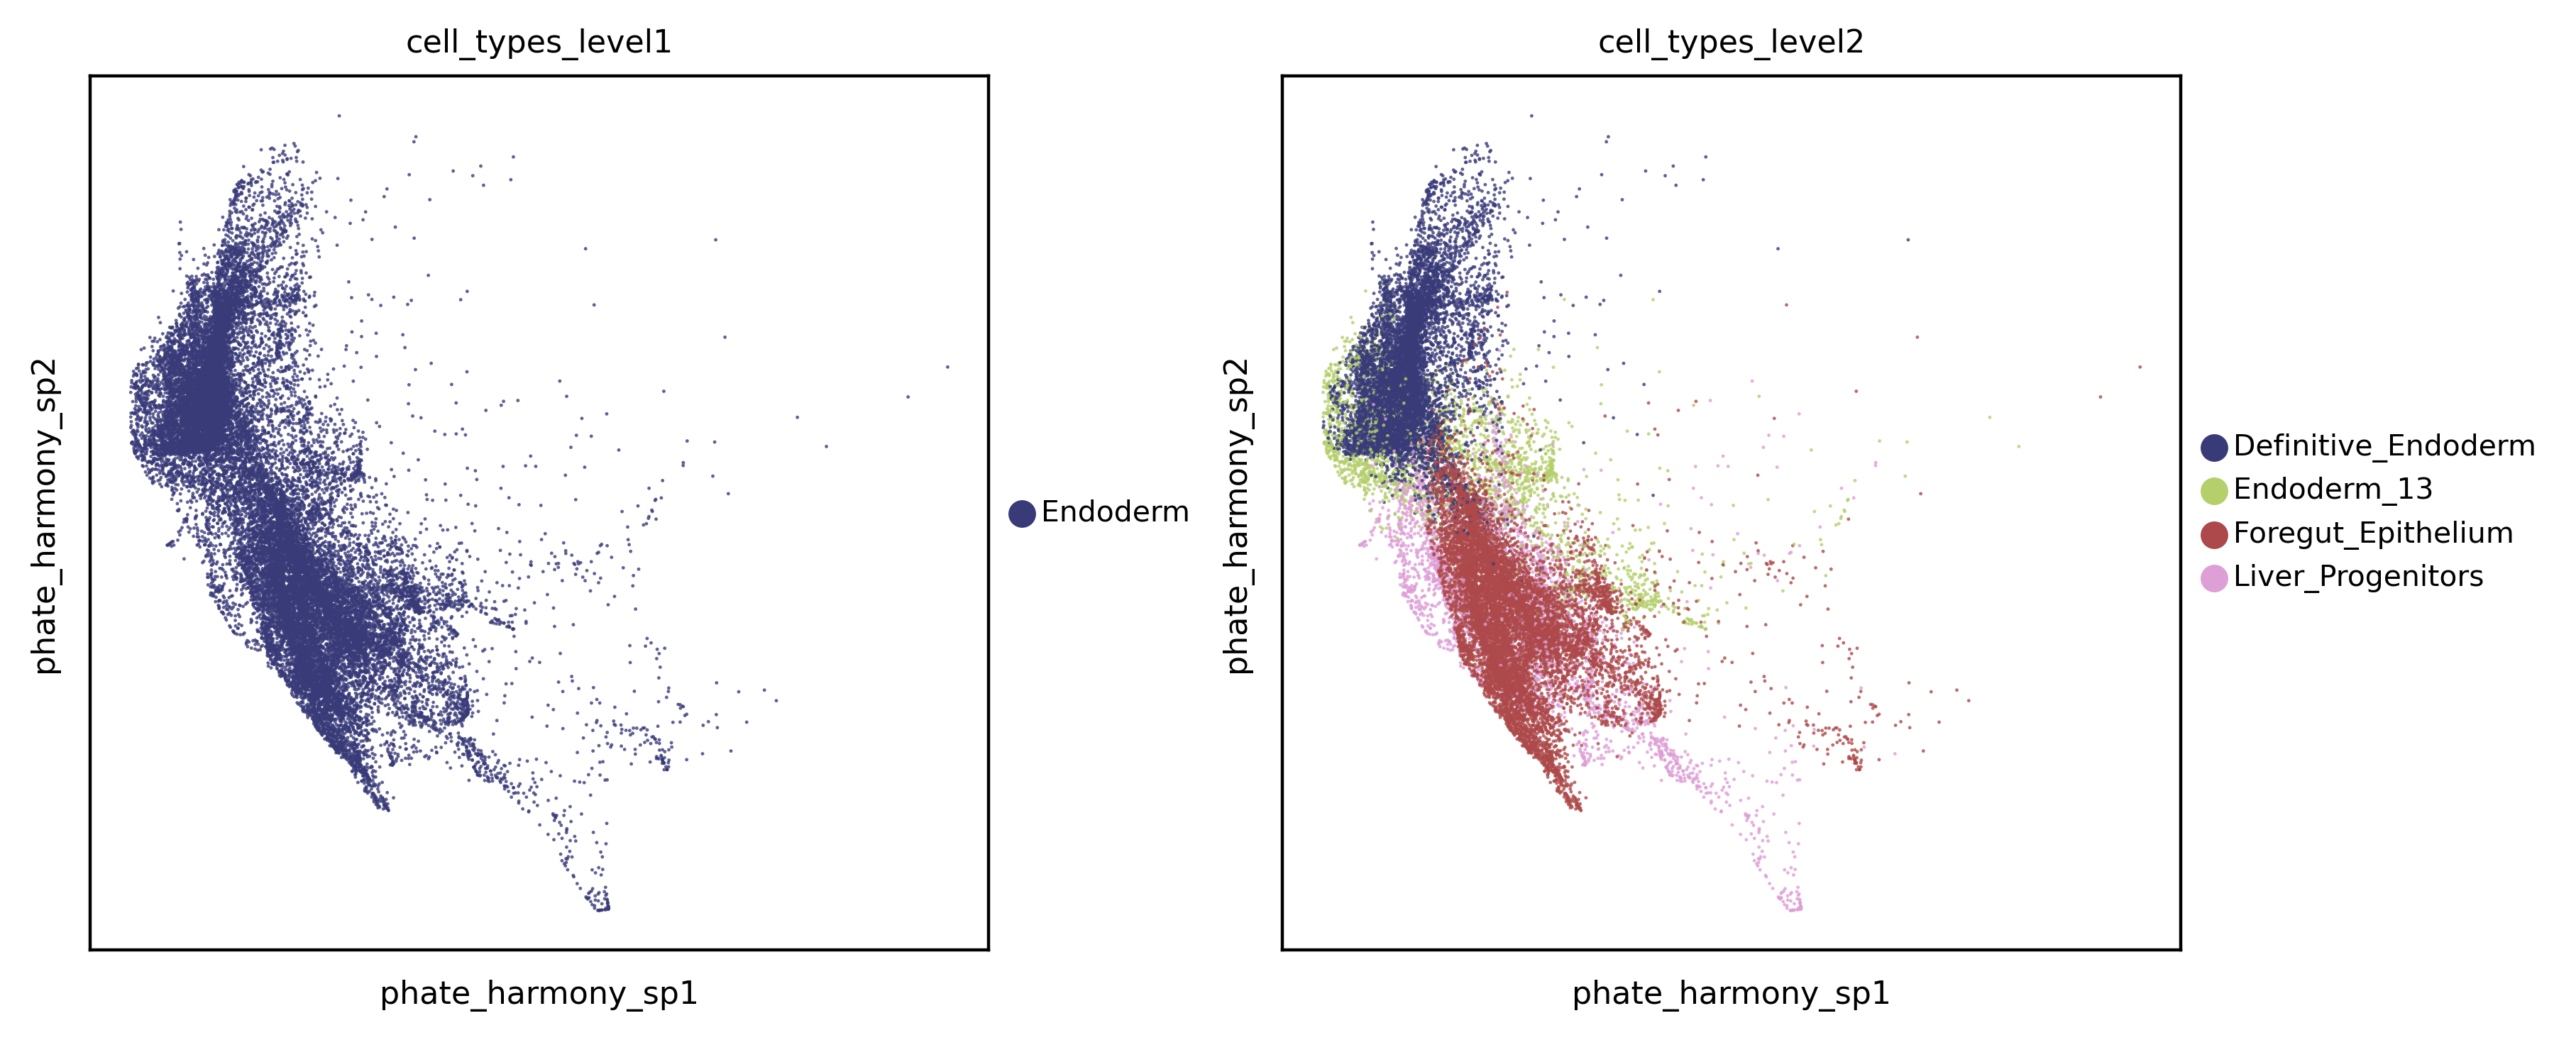

In [12]:
sc.set_figure_params(
    figsize=(4,4),
    fontsize=8,
    transparent=False,
    dpi=200
)
sc.pl.embedding(
    adata,
    basis='phate_harmony_sp',
    color=['cell_types_level1','cell_types_level2'],
    # edges=True, edges_width=0.01, 
    # legend_loc='on data', legend_fontsize=6,legend_fontoutline=1, #labels on plot
    palette='tab20b',
    color_map='cividis',
    size=3, alpha=0.8,
    sort_order=True,
#     return_fig=True,
    ncols=3
)

# DGEA

In [13]:
groupby="cell_types_level2"
sc.tl.rank_genes_groups(
    adata, 
    groupby=groupby, 
    method='wilcoxon',
    layer='data',
    pts=True
)

In [14]:
tmp = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
print(tmp.iloc()[1:20,:])

   Definitive_Endoderm Endoderm_13 Foregut_Epithelium Liver_Progenitors
1               PTPN13      SLC2A3            ONECUT2             APOA1
2              FAM184A      ANKRD1               AMBP              APOB
3               PCAT14      COL4A1             MALAT1           S100A14
4              COLEC12       KRT18              ANXA4              RBP4
5               MT-CO3       RAB17             SPINK1             APOC1
6        RP11-114G22.1     S100A13                AFP               GSN
7                 CTSV        FBN2               SOX4              CUBN
8                RPS16       TNNC1               SAT1              MTTP
9              MT-RNR1       PODXL             PARD3B              APOE
10           MIR302CHG        KRT8                VIM             SPARC
11              COL4A6       APLP2              PDE3A             GLUD1
12               FGFR1       PRAG1             LYPD6B               FGA
13                 FRY        GJA1               RBP1           

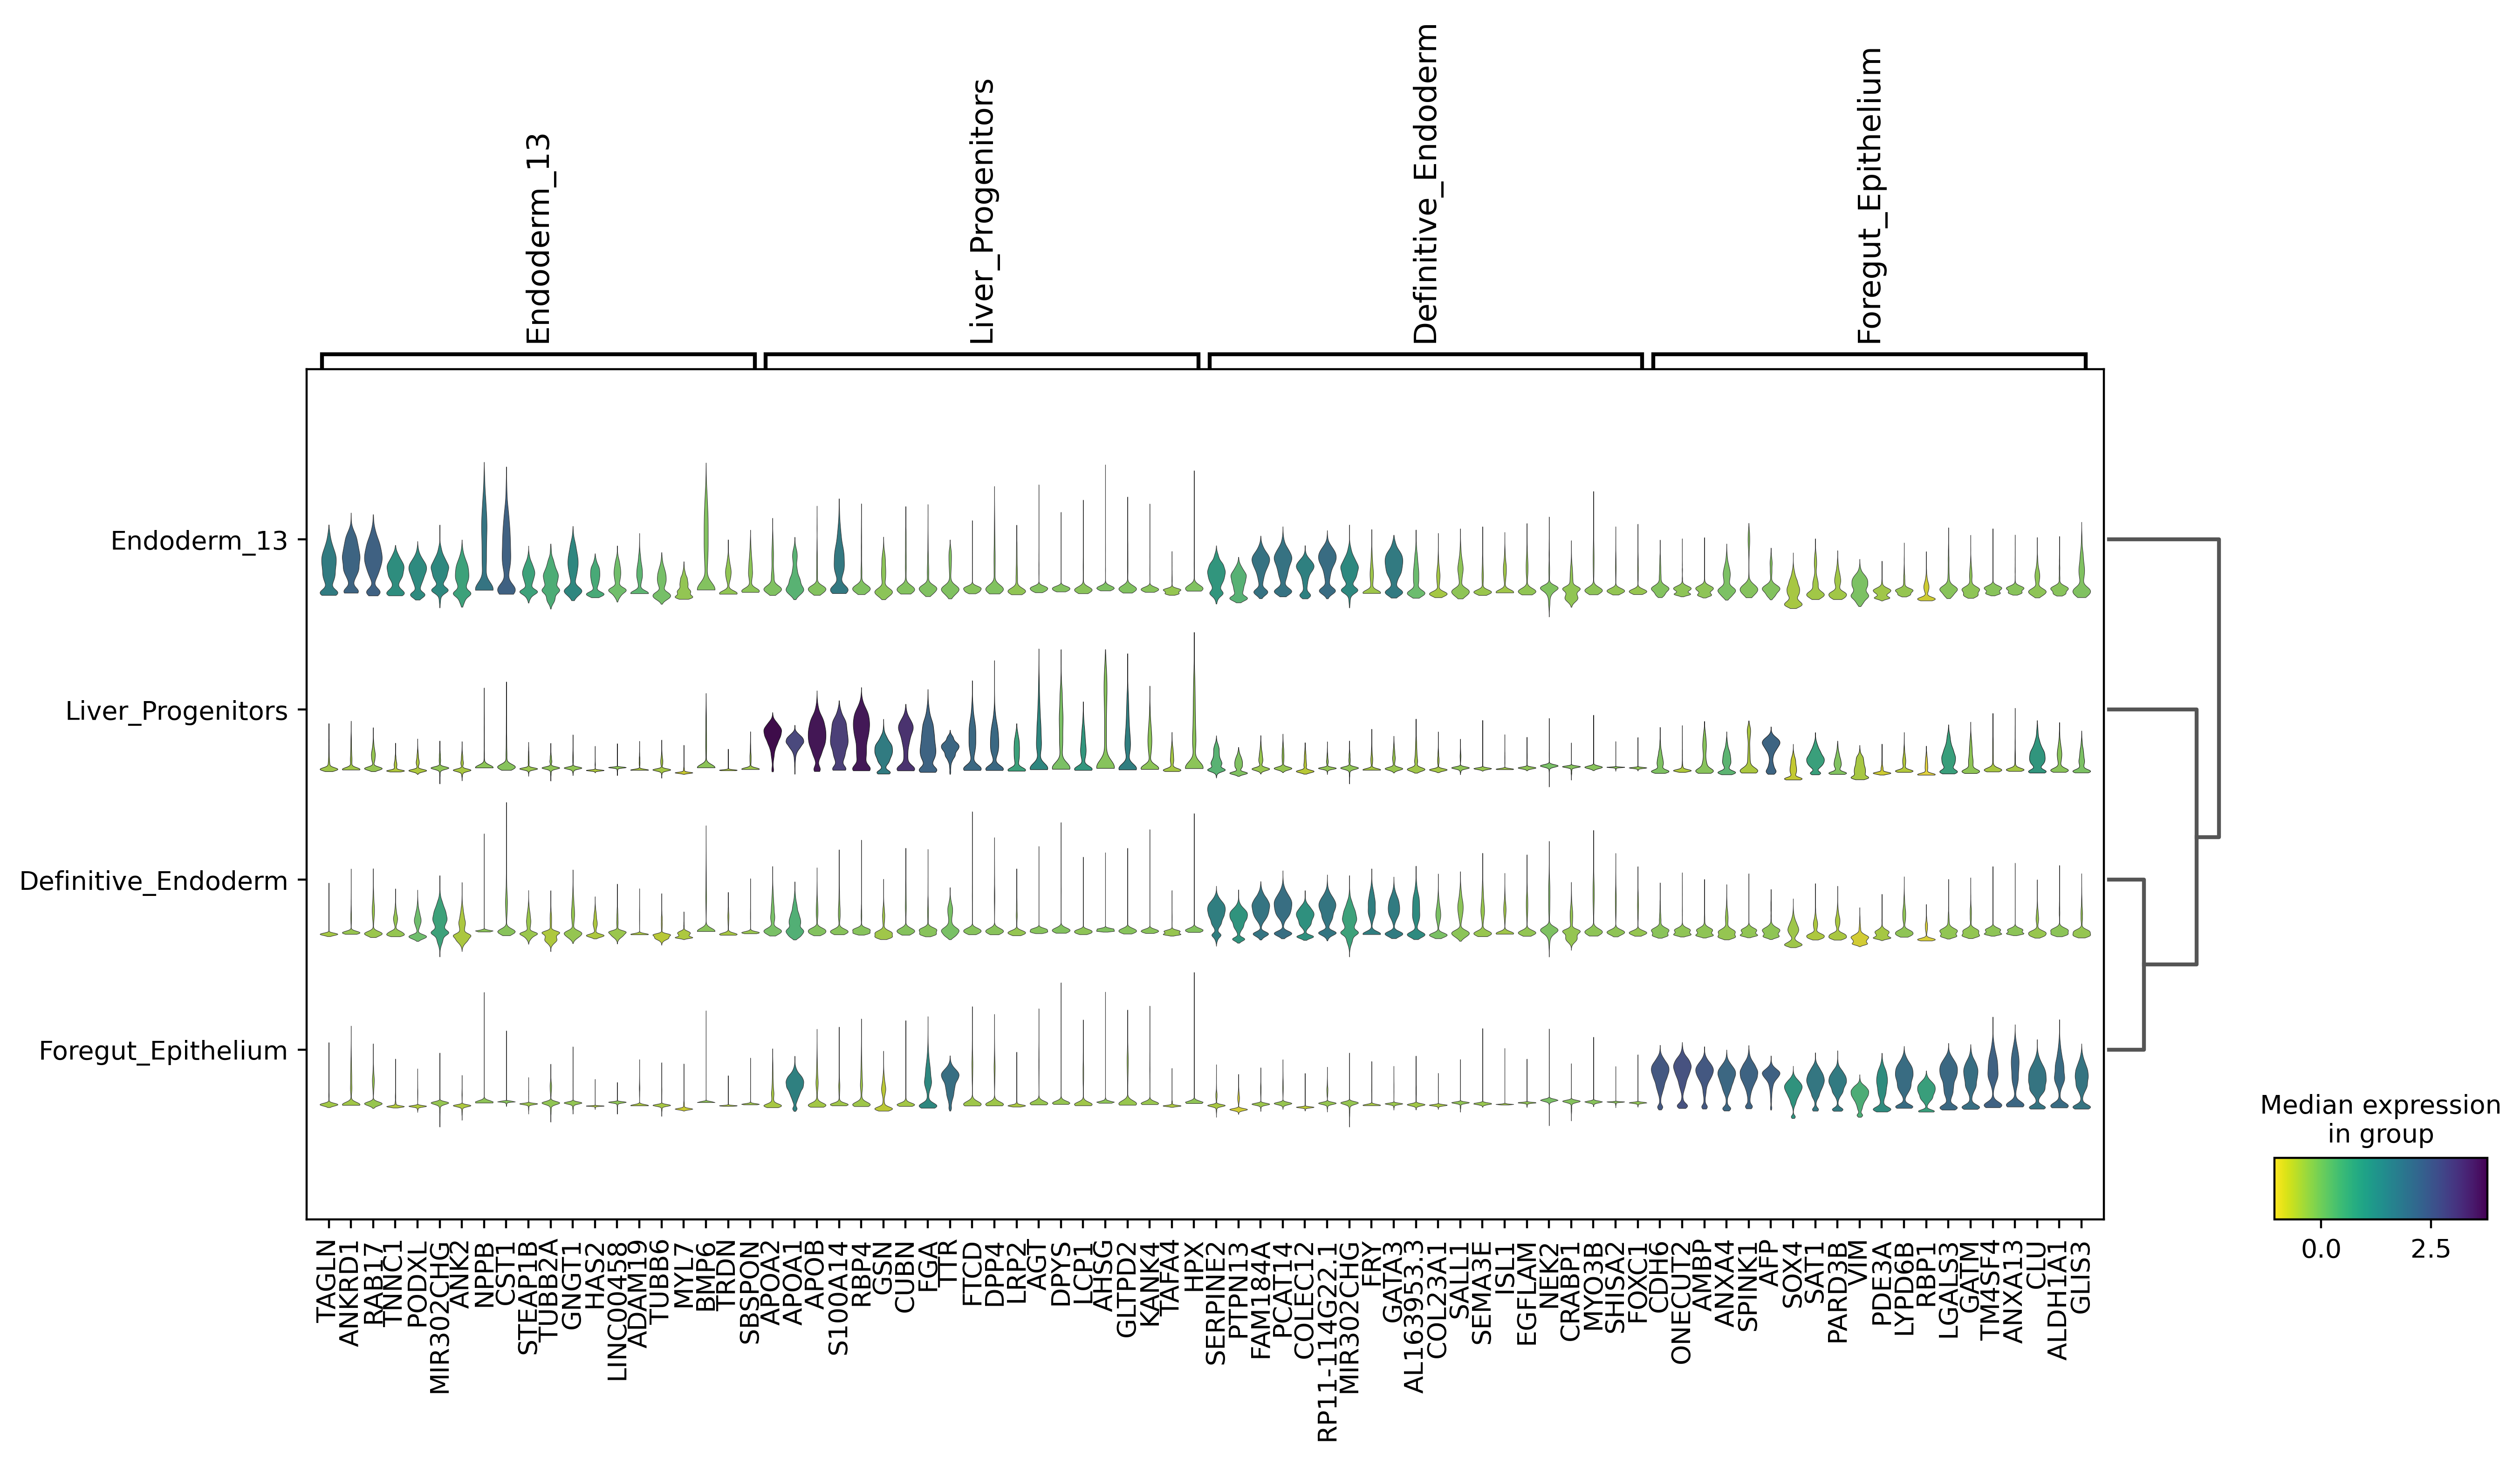

In [24]:
sc.set_figure_params(
    # figsize=(12,16),
    fontsize=12,
    transparent=False,
    # dpi_save=400,
    dpi=200
)

# Rerun dendrogram...
if False:
    sc.tl.dendrogram(
        adata,
        # groupby="leiden_harmony_sp_1.0",
        groupby=groupby,
        n_pcs = npcs(adata,reduction="harmony_sp"),
        use_rep="harmony_sp"
        # var_names=""
    )

sc.pl.rank_genes_groups_stacked_violin(
    adata,
    n_genes=20,
    min_logfoldchange=2.5,
    cmap='viridis_r',
    # return_fig=True,
    figsize=(15,6)
)

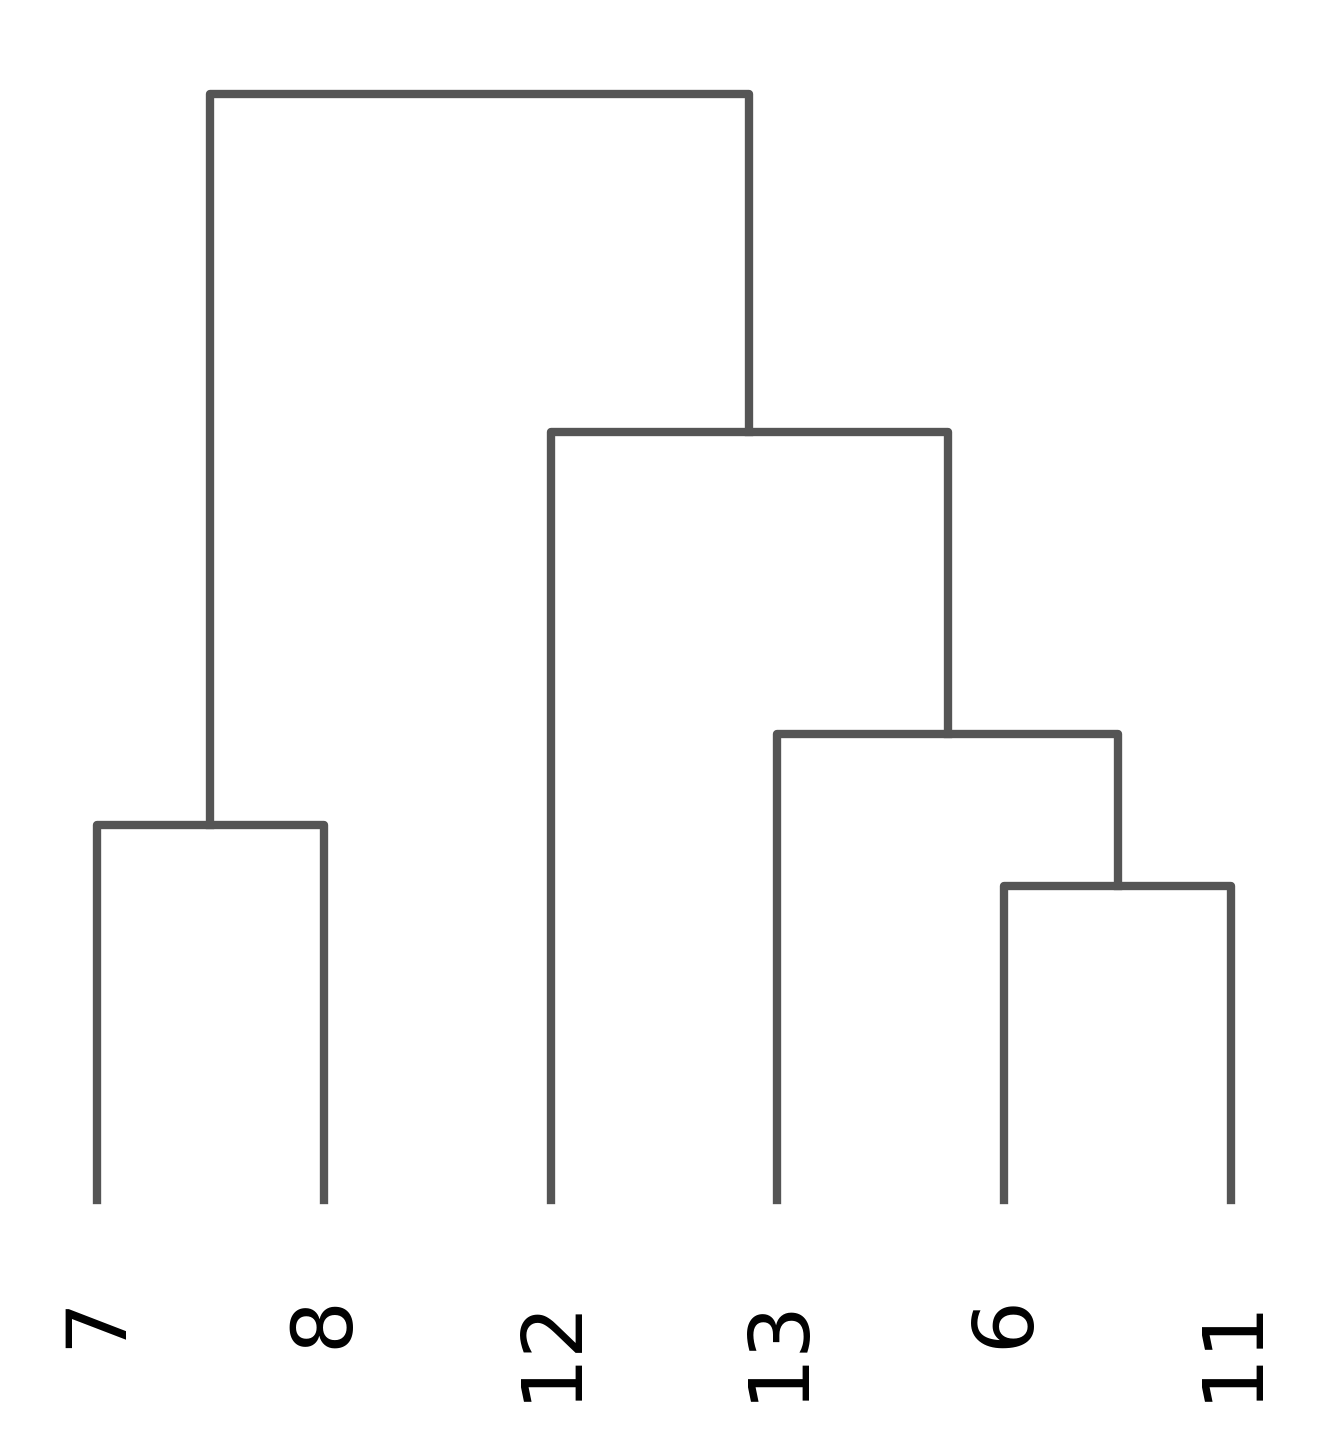

In [44]:
ax = sc.pl.dendrogram(adata, groupby) 

# Re-compute PHATE embedding

In [25]:
import phate

PHATE param combos tried:

```
knn=20,
decay=20,
t='auto'
```

```
knn=50,
decay=20,
t='auto'
```

``` 
knn=20,
decay=100,
t='auto'
```


``` 
knn=20,
decay=40,
t='auto'
```

In [53]:
phate_operator = phate.PHATE(
    knn=20,
    decay=40,
    t='auto',
    mds_solver='smacof',
    n_jobs=32
)

# Use top N harmony dims which account for 95% of variance in harmony embedding
n_dims=npcs(adata,reduction="harmony_sp",var_perc=0.90)
print(f"Using {n_dims} dimensions from `harmony_sp`")

tmp_phate = phate_operator.fit_transform(adata.obsm["harmony_sp"][:,:n_dims]) 
adata.obsm['phate_harmony_sp'] = tmp_phate

Using 40 dimensions from `harmony_sp`
Calculating PHATE...
  Running PHATE on 26053 observations and 40 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 72.78 seconds.
    Calculating affinities...
    Calculated affinities in 0.49 seconds.
  Calculated graph and diffusion operator in 73.46 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.64 seconds.
    Calculating KMeans...
    Calculated KMeans in 20.26 seconds.
  Calculated landmark operator in 26.89 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 4.68 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.26 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 31.10 seconds.
Calculated PHATE in 138.40 seconds.


/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


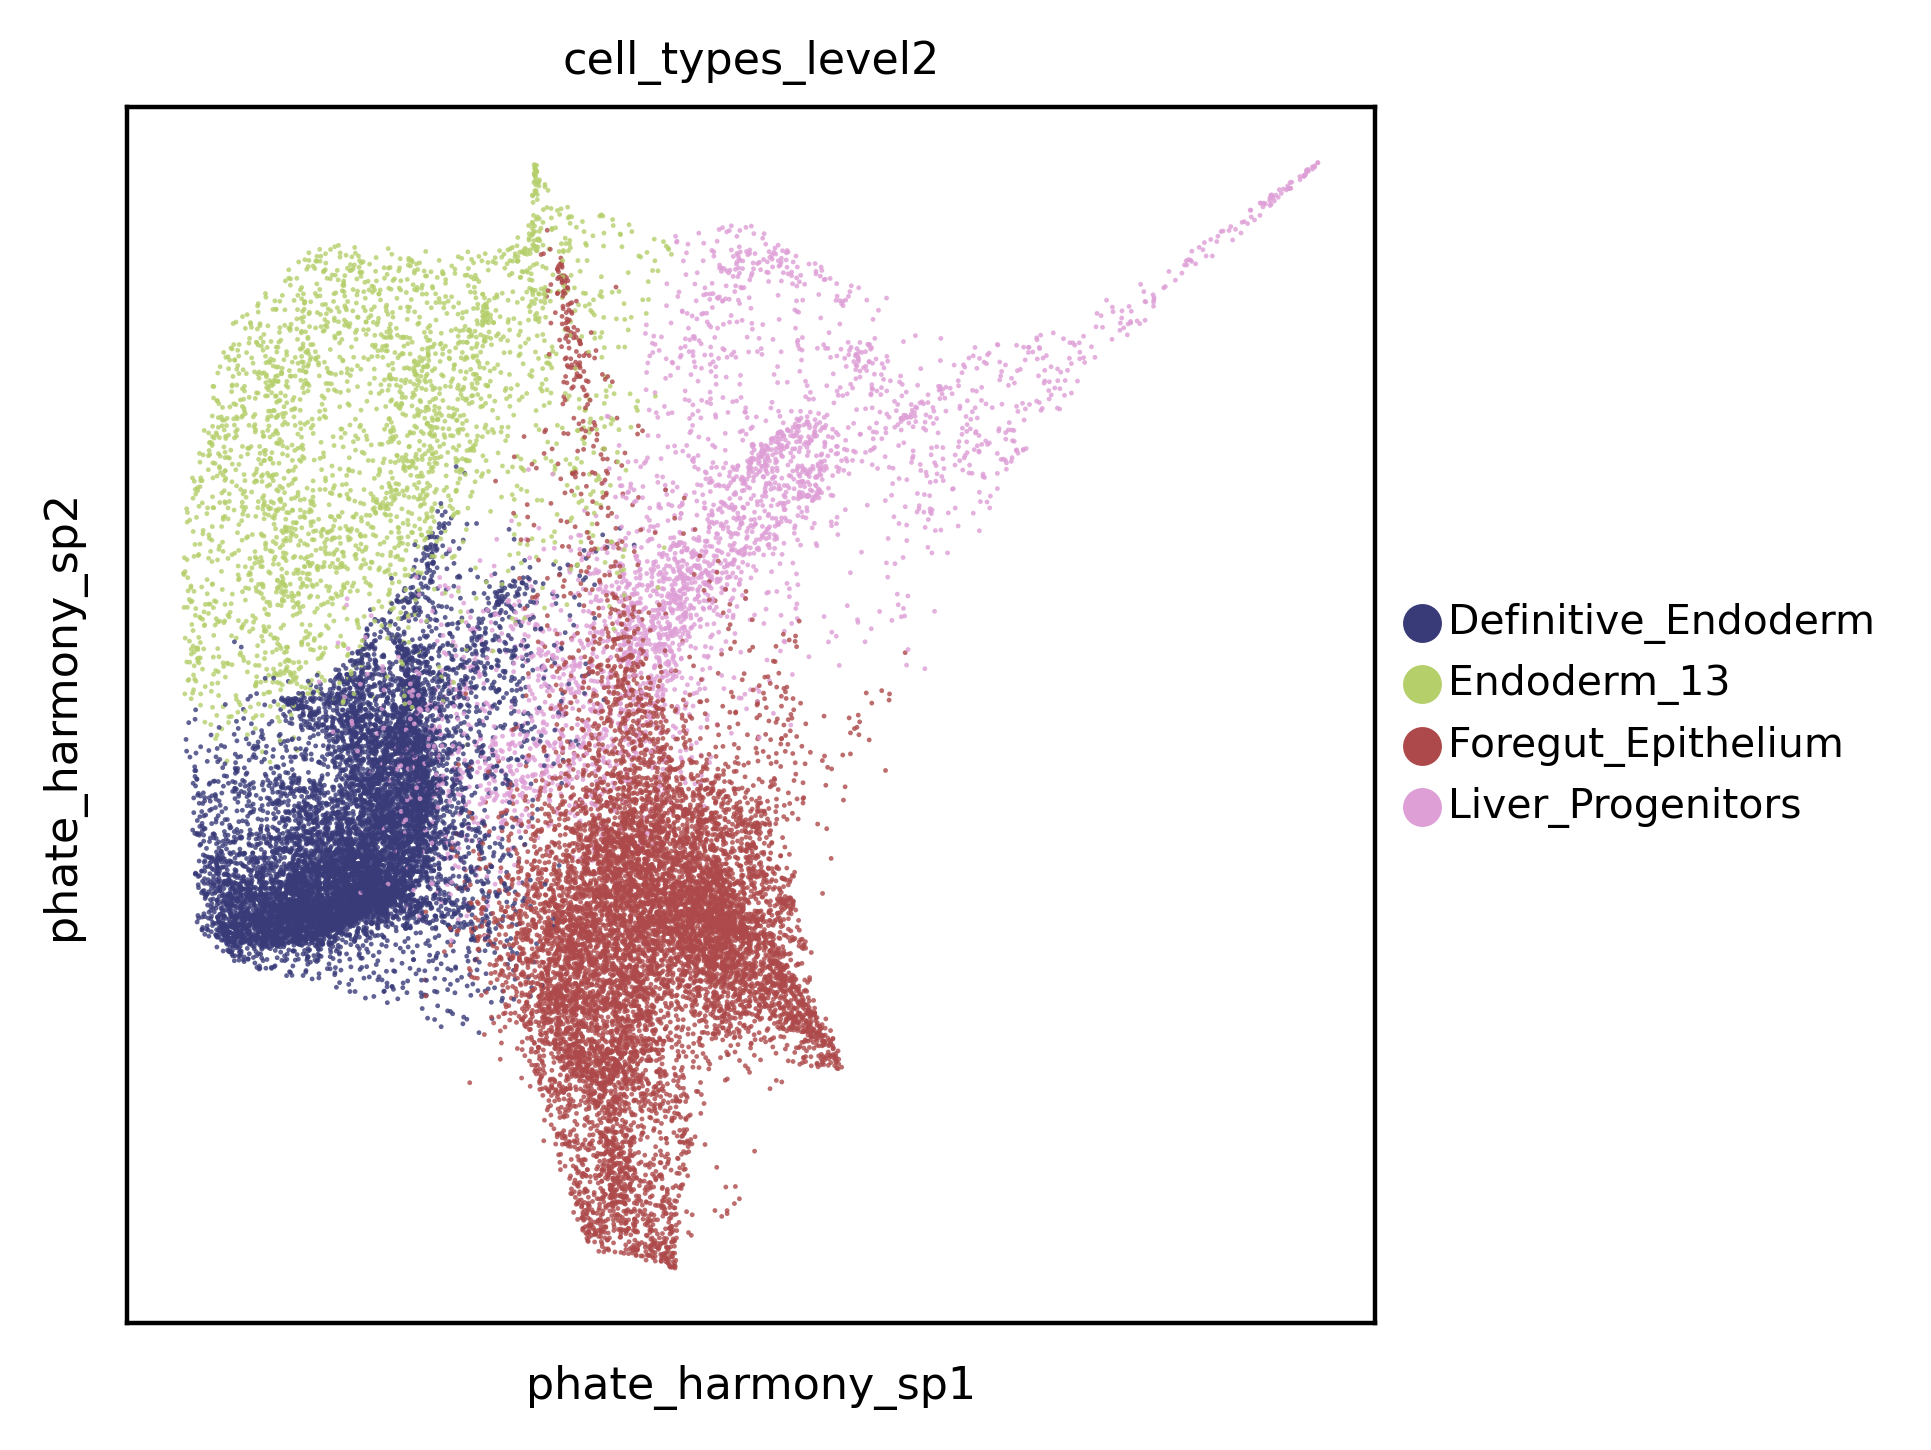

In [55]:
sc.set_figure_params(
    figsize=(4,4),
    fontsize=8,
    transparent=False,
    dpi=200
)
sc.pl.embedding(
    adata,
    basis='phate_harmony_sp',
    # color=['leiden_harmony_sp_10_types','pattern'], 
    color=['cell_types_level2'],
    # edges=True, edges_width=0.01, 
    # legend_loc='on data', legend_fontsize=6,legend_fontoutline=1, #labels on plot
    palette='tab20b',
    # color_map='cividis',
    size=3, alpha=0.8,
    sort_order=True,
#     return_fig=True,
    ncols=3
)